In [110]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [2]:
def abs_max_arg(l):
    return np.argmax(np.abs(l))

In [3]:
def upper_solve(A,b):
    A = A.astype('float64'); b = b.astype('float64')
    if (A.shape[1]!=b.shape[0]): raise Exception("Dimensions don't match")
    n = A.shape[1]
    x = np.zeros(n, dtype=np.float64)
    for i in range(n-1, -1, -1):
        tmp = b[i]
        tmp -= np.dot(x, A[i,:])
        x[i] = tmp/A[i,i]
    
    return x

def lower_solve(A,b):
    A = A.astype('float64'); b = b.astype('float64')
    if (A.shape[1]!=b.shape[0]): raise Exception("Dimensions don't match")
    n = A.shape[1]
    x = np.zeros(n, dtype=np.float64)
    for i in range(0,n):
        tmp = b[i]
        tmp -= np.dot(x, A[i,:])
        x[i] = tmp/A[i,i]
    
    return x

In [148]:
def lup(A):
    A = A.astype('float64')
    if A.shape[0] != A.shape[1]:
        raise Exception('Input is not a square matrix')
    m = A.shape[0]
    U = A.copy(); L = np.eye(m, dtype=np.float64); P = np.eye(m, dtype=np.float64)
    
    for k in range(m-1):
        i = k + abs_max_arg(U[k:,k])
        if(k!=i):
            U[[k,i], :] = U[[i,k], :]
            L[[k,i], :k] = L[[i,k], :k]
            P[[k,i], :] = P[[i,k], :]
        for j in range(k+1,m):
            L[j,k] = U[j,k]/U[k,k]
            U[j,k:] = U[j,k:] - L[j,k]*U[k,k:]
#         print(k,"\n\n",P,"\n\n",L,"\n\n",U,"\n-------------\n")
    return (P,L,U)

def solveLup(P,L,U,b):
    b_ = P@b
    y = lower_solve(L,b_)
    x = upper_solve(U,y)
    return x.reshape(-1,1)

In [149]:
def find_rook_pivot(U):
    i = 0; j = 0
    i_change = True; j_change = True
    
    while(i_change or j_change):
        i_change = False; j_change = False
        if(i != abs_max_arg(U[:,j])):
            i_change = True
            i = abs_max_arg(U[:,j])
        elif(j != abs_max_arg(U[i,:])):
            j_change = True
            j = abs_max_arg(U[i,:])
        
    return i,j
        

def lupq(A):
    A = A.astype('float64')
    if A.shape[0] != A.shape[1]:
        raise Exception('Input is not a square matrix')
    m = A.shape[0]
    U = A.copy(); L = np.eye(m, dtype=np.float64); P = np.eye(m, dtype=np.float64); Q = np.eye(m, dtype=np.float64)
    
    for k in range(m-1):
        (i,j) = find_rook_pivot(U[k:,k:])
        (i,j) = (i+k,j+k)

        U[[k,i], :] = U[[i,k], :]
        U[:, [k,j]] = U[:, [j,k]]

        L[[k,i], :k] = L[[i,k], :k]

        P[[k,i], :] = P[[i,k], :]

        Q[:, [k,j]] = Q[:, [j,k]]
            
        for l in range(k+1,m):
            L[l,k] = U[l,k]/U[k,k]
            U[l,k:] = U[l,k:] - L[l,k]*U[k,k:]
#         print(P,"\n\n",L,"\n\n",U,"\n\n",Q,"\n-------------\n")
    return (P,Q,L,U)

def solveLupq(P,Q,L,U,b):
    b_ = P@b
    z = lower_solve(L,b_)
    y = upper_solve(U,z)
    x = Q@y
    return x.reshape(-1,1)

In [207]:
def instabilityMatrix(m):
    M = 2*np.eye(m)-np.tri(m)
    last_col = np.ones(m)
    last_col[-1]=0
    M[:,-1] = M[:,-1]+last_col
    return M

def abs_max(A):
    return max(abs(np.max(A)),abs(np.min(A)))

def rbe(A,x,b): return np.linalg.norm(A@x-b,2)/np.linalg.norm(b,2)

In [186]:
A = np.array([[2,1,1,0], [4,3,3,1], [8,7,9,5],[6,7,9,8]])
b = np.array([4,3,2,1]).reshape(-1,1)

In [188]:
(P,L,U) = lup(A)
solveLup(P,L,U,b)

array([[ 6.5],
       [-5.5],
       [-3.5],
       [ 4. ]])

In [189]:
(P,Q,L,U) = lupq(A)
solveLupq(P,Q,L,U,b)

array([[ 6.5],
       [-5.5],
       [-3.5],
       [ 4. ]])

In [90]:
M = instabilityMatrix(60)
# M[0,0]=1.1
(P,L,U)=lup(M)

In [89]:
# P,L,U[:,-1]

In [88]:
# np.allclose(P@M,L@U)

In [87]:
# (P@M), (L@U)

In [85]:
# np.linalg.norm(P@M-L@U,2)/np.linalg.norm(M,2)

In [86]:
# np.linalg.norm(M,2)

In [84]:
# (L@U)[:,-1]

In [117]:
y_partial = []
y_complete = []
x = range(1,61)
for i in x:
    M = instabilityMatrix(i)
    (P,L,U)=lup(M)
    y_partial.extend([abs_max(U)/abs_max(A)])
    (P,Q,L,U)=lupq(M)
    y_complete.extend([abs_max(U)/abs_max(A)])

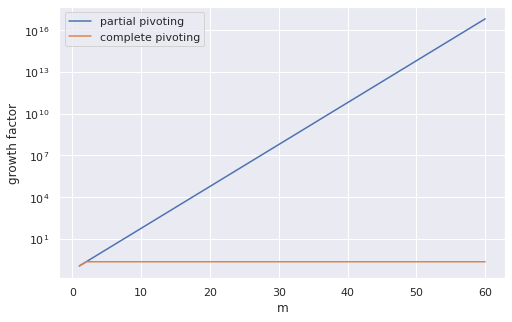

In [136]:
fig = plt.figure(figsize=(8,5))
plt.plot(x,y_partial,label='partial pivoting')
plt.plot(x,y_complete,label='complete pivoting')
plt.xlabel('m')
plt.ylabel('growth factor')
plt.yscale('log')
plt.legend()
plt.savefig('growth.png')
plt.show()

In [216]:
rbe_partial = []
rbe_complete = []
r = range(1,61)
for i in r:
    M = instabilityMatrix(i)
    b = np.random.randn(M.shape[0],1)
    (P,L,U)=lup(M)
    x = solveLup(P,L,U,b)
    rbe_partial.extend([rbe(M,x,b)])
    (P,Q,L,U)=lupq(M)
    x = solveLupq(P,Q,L,U,b)
    rbe_complete.extend([rbe(M,x,b)])

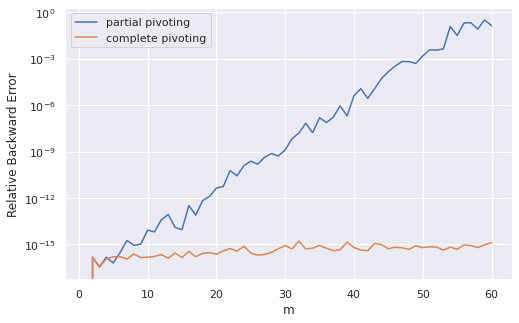

In [218]:
fig = plt.figure(figsize=(8,5))
plt.plot(r,rbe_partial,label='partial pivoting')
plt.plot(r,rbe_complete,label='complete pivoting')
plt.xlabel('m')
plt.ylabel('Relative Backward Error')
plt.yscale('log')
plt.legend()
plt.savefig('rbe.png')
plt.show()